In [573]:
#Importacao das bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt, pi, e

Criacao de listas

In [574]:
dados = pd.read_csv('covid.csv', sep=",")
dadosusados =pd.DataFrame(dados,columns=['Deaths'])
dadosusados1 =pd.DataFrame(dados,columns=['Confirmed'])
quantidade = len(dadosusados)

x =[0]*quantidade               
y =[0]*quantidade
e =[0]*quantidade

xsoma = 0
ysoma = 0

In [575]:
for cont in range(quantidade):
    x[cont] = float(dadosusados.loc[cont])
    y[cont] = float(dadosusados1.loc[cont])
    xsoma = float (xsoma + x[cont])
    ysoma = float (ysoma + y[cont])

xmed = float(xsoma / quantidade)
ymed = float(ysoma / quantidade)

C:\Users\User\AppData\Local\Temp\ipykernel_4768\2373221208.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x[cont] = float(dadosusados.loc[cont])
C:\Users\User\AppData\Local\Temp\ipykernel_4768\2373221208.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y[cont] = float(dadosusados1.loc[cont])


O codigo acima percorre os elementos das listas x e y acumulando a soma dos valores em xsoma e ysoma respectivamente, e em seguida calcula a média desses valores. lembrando xmed e ymed são as médias resultantes.

In [576]:
sxy = 0
syy = 0
sxx = 0
sqreg = 0
sqe = 0

In [577]:
for cont1 in range(quantidade):
    somx = float (x[cont1] - xmed)
    somy = float (y[cont1] - ymed)
    
    sxy = float (somx*somy + sxy)
    sxx = float (somx**2 + sxx)
    syy = float (somy**2 + syy)

correlacao = float(sxy / (pow(sxx*syy, 1/2)))
b = float(sxy / sxx)
a = float(ymed - (b*xmed))

In [578]:
for cont2 in range(quantidade):
    sqe = float (((y[cont2] - (a + (b*x[cont2])))**2 + sqe))
    sqreg = float ((a + (x[cont2]*b) - ymed)**2 + sqreg)
    
fo = float((sqreg)/((sqe)/(quantidade -2)))

In [579]:
X = np.arange(0,170000,0.1)
Y = []

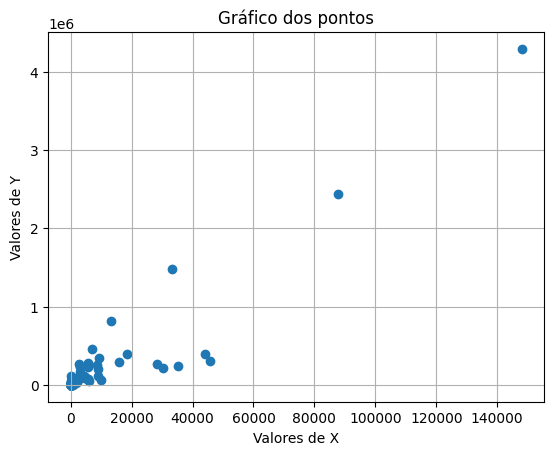

In [580]:
plt.grid()  
plt.scatter(x, y, label="Dados")
plt.title("Gráfico dos pontos")
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.show()

# **Respostas do trabalho**


- **A) Faca o gráfico das distribuições de cada uma  das duas variáveis em dois gráficos diferentes**

In [581]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

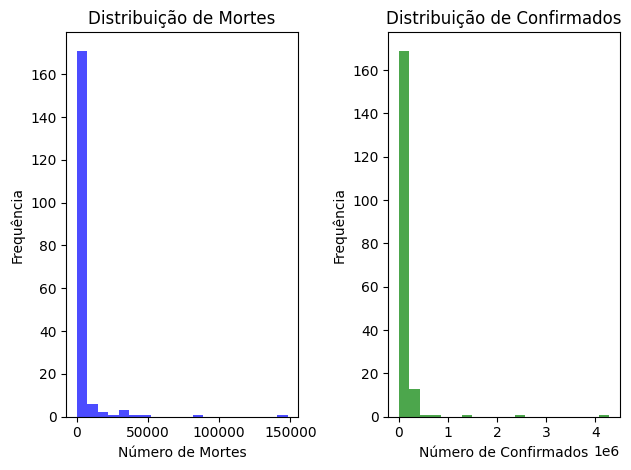

In [582]:
plt.subplot(1, 2, 1)
plt.hist(dadosusados, bins=20, color='blue', alpha=0.7)
plt.title('Distribuição de Mortes')
plt.xlabel('Número de Mortes')
plt.ylabel('Frequência')


plt.subplot(1, 2, 2)
plt.hist(dadosusados1, bins=20, color='green', alpha=0.7)
plt.title('Distribuição de Confirmados')
plt.xlabel('Número de Confirmados')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


- **B) Através das distribuições é possível identificar pontos influentes em alguma das variáveis?**   

In [583]:
# Atraves da distribuição, foi possível encontrar pontos influentes, que sao pontos que podem afetar uma reta de regressão de mínimos quadrados alterando o valor de y.

- **C) Faça o gráfico xy do conjunto de dados. Visualmente, é possível identificar alguma correlação entre as variáveis?**          

In [584]:
# Sim, pois a partir do coeficiente de correlacao foi identificado uma correlação se aproximando do 1.

- **D) Calcule o coeficiente de correlação e comente o resultado:** 

In [585]:
    print('O coeficiente de correlação e: %.3f' %correlacao)

O coeficiente de correlação e: 0.935


In [586]:
# O coeficiente de correlção se aproximando do 1 diz que a reta dos mínimos quadrados tende a crescer.

- **E) Encontre a reta de quadrados mínimos (estime β0, β1 e σ2):** 

In [587]:
print('A reta eh: Y = {} + {}X '.format(a, b))
print("\n")
print('B1 = {}; B0 = {} e a variância = {}'.format(a, b, (syy/quantidade)))

A reta eh: Y = -742.5754629227013 + 25.41044623165475X 


B1 = -742.5754629227013; B0 = 25.41044623165475 e a variância = 146147459013.93173


In [588]:
for cont3 in range(len(X)):
    Y.append(a + b*X[cont3])

- **F) Faça o gráfico os dados no plano xy incluindo a reta de quadrados mínimos encontrada no item anterior:**  

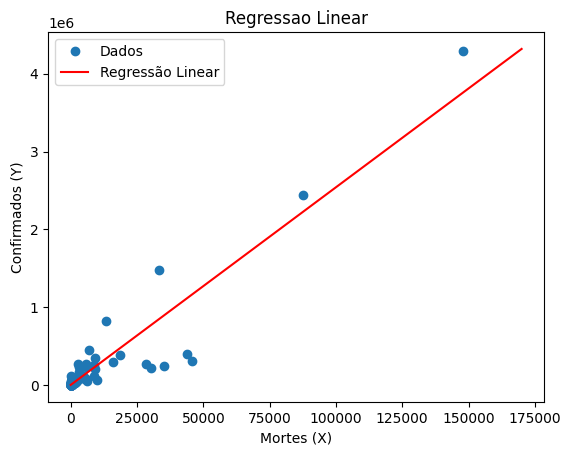

In [589]:
plt.title('Regressao Linear')
plt.ylabel('Confirmados (Y)')
plt.xlabel('Mortes (X)')
plt.plot(x, y, "o", label='Dados')
plt.plot(X, Y, color='red', label='Regressão Linear')
plt.legend()
plt.show()


- **G) Calcule os resíduos:**

In [590]:
print("Residuos:")
for cont3 in range(quantidade):
    e[cont3] = [float(y[cont3] - (a + (b*x[cont3]))) for cont3 in range(quantidade)]     
    print('e{} = {}' .format((cont3 + 1), e[cont3]))  

Residuos:
e1 = [4759.719194952824, 1963.4712055644172, -836.7735044917717, 328.2322588766542, 650.7471674248566, 752.344124227737, 90428.02044029083, 20065.748192216175, 11802.030942236357, 3182.927299752864, 20439.956706932742, 845.060554374499, 36641.70254425938, 151625.60238606637, 674.7023393011181, 54322.75539029245, -182410.82742439024, 739.7545704593917, 1623.209844814785, 841.5754629227013, 4662.124287732586, 3769.904270816205, 1430.7545704593917, 216705.09753779694, 807.344124227737, 2546.150620538503, 495.82181264499945, 940.1127855327727, 1095.1650166910465, 2511.545645826297, 968.5754629227013, 7917.090986345695, -110070.45563299739, 3842.359135255071, -241.2080044514048, 115219.80593271053, -30785.462191661805, 34816.088887688995, 918.7023393011181, 2570.4113664133447, 4301.202646738513, 13661.374146282405, 13958.172624683844, 2091.5234367226913, 1063.8666407687383, 1319.776984521261, 6780.47901851548, -1073.0280770816607, 4327.769581486726, 760.5754629227013, 37379.062194

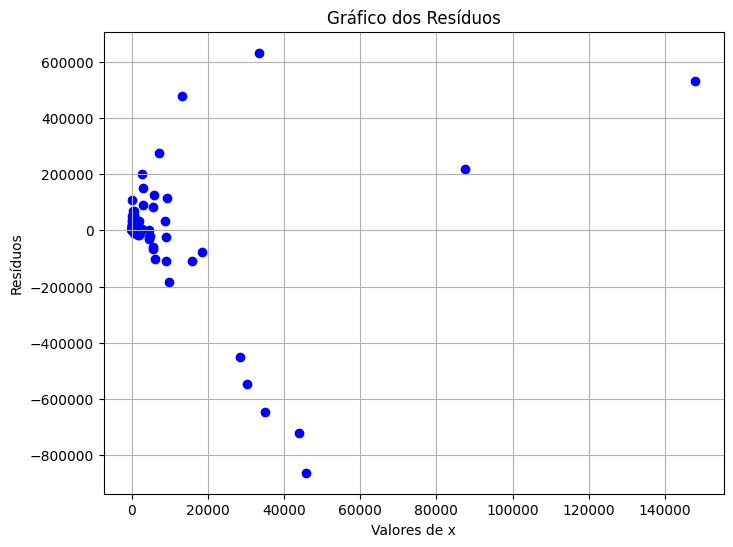

In [591]:
plt.figure(figsize=(8, 6))
plt.scatter(x, e[cont3], color='blue')
plt.title('Gráfico dos Resíduos')
plt.xlabel('Valores de x')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

- **H) Comente sobre os valores dos resíduos e os pontos influentes visualmente detectados no item b):**

In [592]:
# Atraves dos resultados obtidos pode se observar que há um número significativo de resíduos com magnitudes muito altas e negativos. 
# Isso indica a presença de observações que podem ter uma influência desproporcional sobre o modelo de regressão. 
# Pontos com resíduos extremamente altos podem indicar que essas observações têm um impacto significativo na estimativa dos parâmetros do modelo.

- **I) Monte a tabela ANOVA e, para o intervalo de confiança de 95%, verifique se a hipótese nula (modelo simples) é rejeitada (utilize a tabela da distribuição F do livro):**

In [593]:
# TABELA ANOVA
print('  FV     |    GL      |         SQ           |         QM        |  Fo')
print('Regressão|    1       |   {:.2f}  | {:.2f} | {:.2f}'.format((sqreg), (sqreg), fo))
print('Erro     |  {:.2f}    |   {:.2f}   | {:.2f}    |'.format((quantidade-2), (sqe), (sqe/(quantidade-2))))
print('Total    |  {:.2f}    |   {:.2f} |'.format((quantidade-1), (ysoma**2)))

  FV     |    GL      |         SQ           |         QM        |  Fo
Regressão|    1       |   23876788139445.80  | 23876788139445.80 | 1279.32
Erro     |  185.00    |   3452786696159.43   | 18663711871.13    |
Total    |  186.00    |   271606385835225.00 |


In [594]:
if (sqreg/(sqe/(quantidade - 2))) < 5.59:
    print('Rejeitamos H0!')
else:
    print('Rejeitamos h1!') 

Rejeitamos h1!


- **J) Retire os pontos classificados como influentes e repita os passos:**

Primeiro vamos encontrar os pontos flutuantes de x e y

In [598]:
def identificar_outliers(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    threshold = 2

    outliers = []
    for value in data:
        z_score = (value - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(value)

    return outliers

dados = pd.read_csv('covid.csv')
dados_usados = dados['Confirmed'].tolist()
outliers = identificar_outliers(dados_usados)

print("Os outliers são:", outliers)



Os outliers são: [2442375, 1480073, 4290259]


In [599]:
def identificar_outliers(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    threshold = 2

    outliers = []
    for value in data:
        z_score = (value - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(value)

    return outliers

dados = pd.read_csv('covid.csv')
dados_usados = dados['Deaths'].tolist()
outliers = identificar_outliers(dados_usados)

print("Os outliers são:", outliers)

Os outliers são: [87618, 33408, 35112, 44022, 148011, 45844]


Agora vamos remover os pontos

A reta eh: Y = 6700.808491921547 + 23.282256346761752X 


B1 = 23.282256346761752; B0 = 6700.808491921547 e a variância = 189497824317.5208


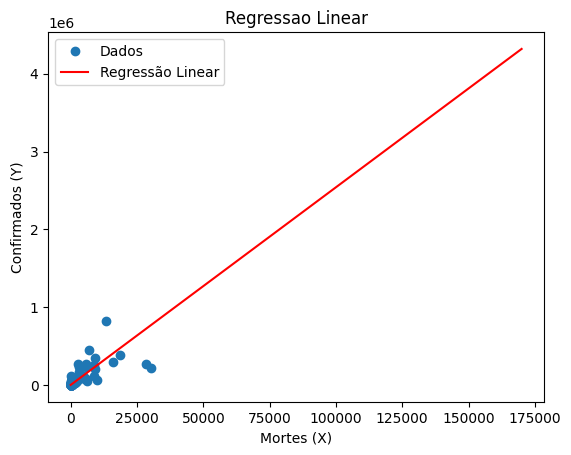

In [609]:
pontos_influentes_x = [87618, 33408, 35112, 44022, 148011, 45844]
pontos_influentes_y = [2442375, 1480073, 4290259]

indices_para_remover = []

for i in range(len(x)-1, -1, -1):
    if x[i] in pontos_influentes_x or y[i] in pontos_influentes_y:
        indices_para_remover.append(i)

x = [x[i] for i in range(len(x)) if i not in indices_para_remover]
y = [y[i] for i in range(len(y)) if i not in indices_para_remover]

for cont1 in range(len(x)):
    somx = float (x[cont1] - xmed)
    somy = float (y[cont1] - ymed)
    
    sxy = float (somx*somy + sxy)
    sxx = float (somx**2 + sxx)
    syy = float (somy**2 + syy)

correlacao = float(sxy / (pow(sxx*syy, 1/2)))
b = float(sxy / sxx)
a = float(ymed - (b*xmed))

print('A reta eh: Y = {} + {}X '.format(a, b))
print("\n")
print('B1 = {}; B0 = {} e a variância = {}'.format(b, a, (syy/quantidade)))

plt.title('Regressao Linear')
plt.ylabel('Confirmados (Y)')
plt.xlabel('Mortes (X)')
plt.plot(x, y, "o", label='Dados')
plt.plot(X, Y, color='red', label='Regressão Linear')
plt.legend()
plt.show()


- **F) Comente sobre os resultados:**

In [ ]:
# Com base na análise da regressão, podemos concluir que a variável X (Mortes) tem uma influência significativa na variável Y (Confirmados), 
# e a relação entre elas é bem representada pela reta encontrada.